# An analysis of Sleep Data among Americans

In this project, I found a dataset with information on self-reported data on how much American sleep, split up into subcategories of age, gender, day of the week, and year. I found the idea of analyzing sleep data not only intriguing but also extremely relevant, so I thought it would be a good idea to analyze it and try to find some trends. The dataset was found on [Kaggle](https://www.kaggle.com/datasets/thedevastator/how-much-sleep-do-americans-really-get?resource=download), which was derived from the [US Bureau of Labor Statistics](https://www.bls.gov/tus/database.htm)

The first step in analyzing the data would be to import packages and read the CSV. In this project, we will use the numpy, pandas, matplotlib, and seaborn packages.

In [17]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [18]:
dataset = pd.read_csv('./dataset.csv')

In [19]:
dataset.set_index('index', inplace=True)

In [20]:
import warnings

warnings.filterwarnings('ignore')

overTheYears = dataset[dataset['Type of Days'] == 'All days'][dataset['Age Group'] == '15 years and over']

## Data by Gender

The first graph that I thought to create is a line plot of the sleep reported by men vs. women, as well as the average between the both:

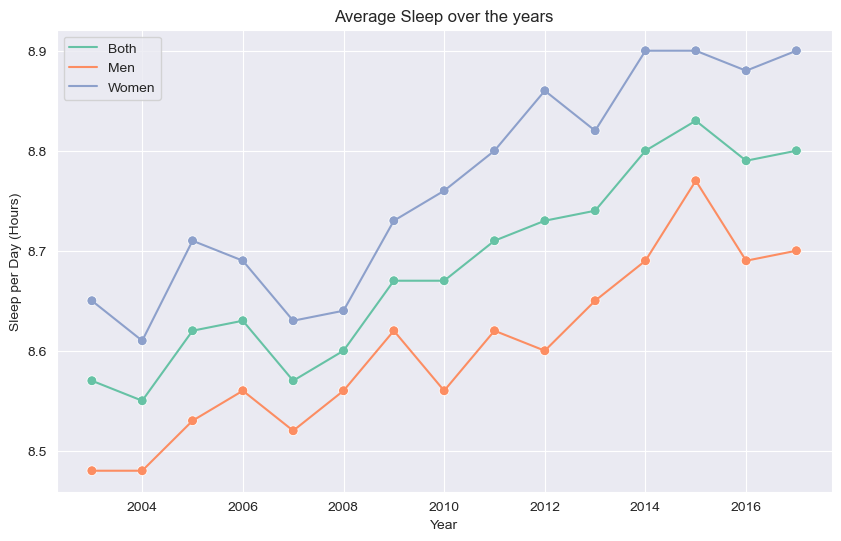

In [21]:
# Create a line graph of over the years

plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(
    data = overTheYears,
    x = "Year",
    y = "Avg hrs per day sleeping",
    hue = "Sex"
)

sns.scatterplot(
    data = overTheYears,
    x = "Year",
    y = "Avg hrs per day sleeping",
    hue = "Sex",
    s = 50,
    marker = "o",
    legend = False
)
# plt.fill_between(overTheYears["Year"], overTheYears["Avg hrs per day sleeping"], overTheYears["Rolling Average"], color="blue", alpha=0.2)
plt.title("Average Sleep over the years")

plt.xlabel("Year")

plt.ylabel("Sleep per Day (Hours)")

plt.legend()

plt.show()


I found it interesting to see that men consistently got below average sleep, while women got above average. Further, despite the spikes, it seems to be trending upwards. So, next I decided to take a rolling average, as well as plot the trend line to see if there was a correlation between the two.

In [22]:
# merge rolling average (both) rolling average (men) and rolling average (women) into one column
overTheYears["Rolling Average (Both)"] = overTheYears[overTheYears['Sex'] == 'Both']['Avg hrs per day sleeping'].rolling(window=3).mean()
overTheYears["Rolling Average (Men)"] = overTheYears[overTheYears['Sex'] == 'Men']['Avg hrs per day sleeping'].rolling(window=3).mean()
overTheYears["Rolling Average (Women)"] = overTheYears[overTheYears['Sex'] == 'Women']['Avg hrs per day sleeping'].rolling(window=3).mean()

overTheYears['Rolling Average'] = overTheYears['Rolling Average (Both)'].fillna(overTheYears['Rolling Average (Men)'])\
.fillna(overTheYears['Rolling Average (Women)'])

# drop the columns that are no longer needed

overTheYears.drop(['Rolling Average (Both)', 'Rolling Average (Men)', 'Rolling Average (Women)'], axis=1, inplace=True)

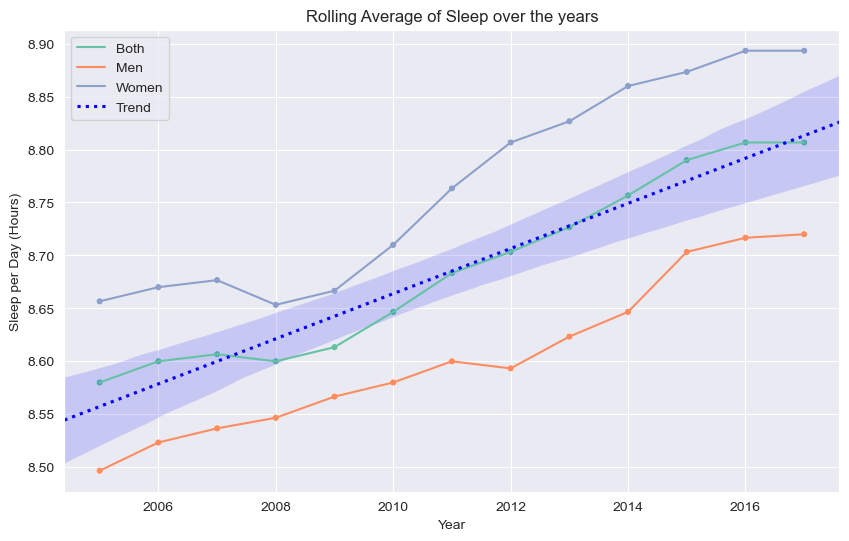

In [23]:
# Create a line graph of over the years with error bars

plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(
    data = overTheYears,
    x = "Year",
    y = "Rolling Average",
    hue = "Sex"
)

sns.scatterplot(
    data = overTheYears,
    x = "Year",
    y = "Rolling Average",
    hue = "Sex",
    marker = "o",
    s = 25,
    legend = False,
)

sns.regplot(
    data = overTheYears,
    x = "Year",
    y = "Rolling Average",
    scatter = False,
    color = "blue",
    label = "Trend",
    order = 1,
    truncate = False,
    line_kws = {"linestyle": ":"},
)

# plt.fill_between(overTheYears["Year"], overTheYears["Avg hrs per day sleeping"], overTheYears["Rolling Average"], color="blue", alpha=0.2)
plt.title("Rolling Average of Sleep over the years")

plt.xlabel("Year")

plt.ylabel("Sleep per Day (Hours)")

plt.legend()

plt.show()


This chart, clearly shows the discrepancy between sleep that men and women get. It also shows a direct correlation of the year to sleep, with the amount of sleep tending to increase with time.

## Data by Age

The first step in analyzing age data would be to extract the data and group it by age groups. Then, I chose to represent the results using a bar graph.

In [24]:
# take the ageGroups combined and get the average across all years
warnings.filterwarnings('ignore')

ageGroups = dataset[dataset['Type of Days'] == 'All days'][dataset['Sex'] == 'Both'][dataset['Age Group'] != '15 years and over']

ageGroups = ageGroups.groupby(['Age Group']).mean()
ageGroups.reset_index(inplace=True)
ageGroups.drop(['Year'], axis=1, inplace=True)

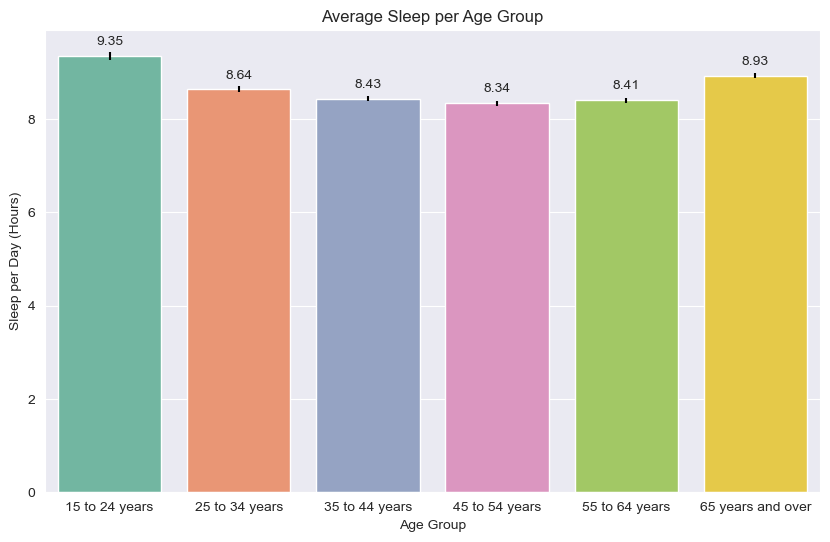

In [25]:
# Create a bar graph showing average sleep across the different age groups

plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

ax = sns.barplot(
    data=ageGroups,
    x = "Age Group",
    y = "Avg hrs per day sleeping",
    yerr=ageGroups['Standard Error'],
    capsize=10,
    errwidth=10,
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Average Sleep per Age Group")

plt.xlabel("Age Group")

plt.ylabel("Sleep per Day (Hours)")

plt.show()


Although this data shows some differences, it's hard to analyze because of the small variations. So, I decided to normalize the data to see if there were any trends.

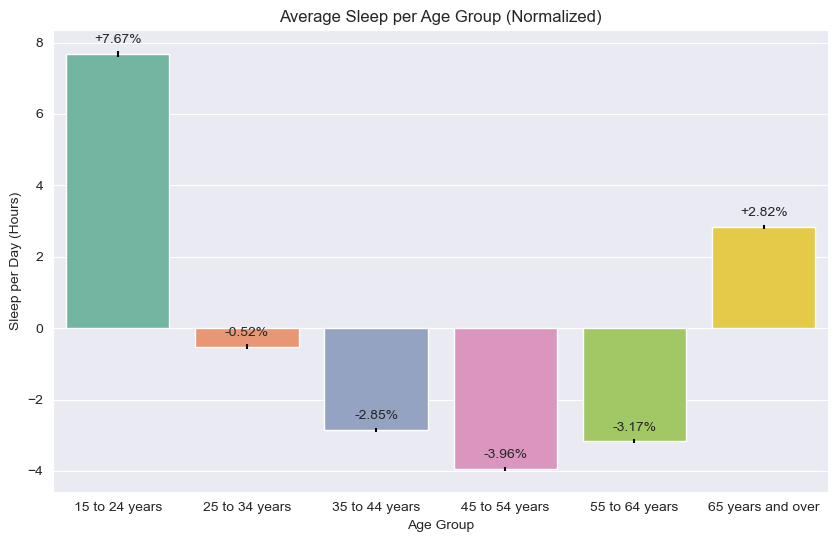

In [26]:
# Normalize the average sleep per age group and graph it as a percent change from the average

ageGroups['Normalized Average'] = (ageGroups['Avg hrs per day sleeping'] / ageGroups['Avg hrs per day sleeping'].mean() * 100) - 100

plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.set_palette('Set2')
ax = sns.barplot(
    data=ageGroups,
    x = "Age Group",
    y = "Normalized Average",
    yerr=ageGroups['Standard Error'],
    capsize=10,
    errwidth=10,
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():+.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Average Sleep per Age Group (Normalized)")

plt.xlabel("Age Group")

plt.ylabel("Sleep per Day (Hours)")

plt.show()

And with this graph, there certainly do seem to be trend. Surprisingly (at least for me), teenagers and young adults seem to be getting the most amount of sleep, even more then the elderly. Also,  it looks like the amount of sleep plummets once people go into working age, which was an interesting correlation to find.

I also thought it would be cool to further split the data into weekdays versus weekends, as I know that I certainly have different habits depending on the day.

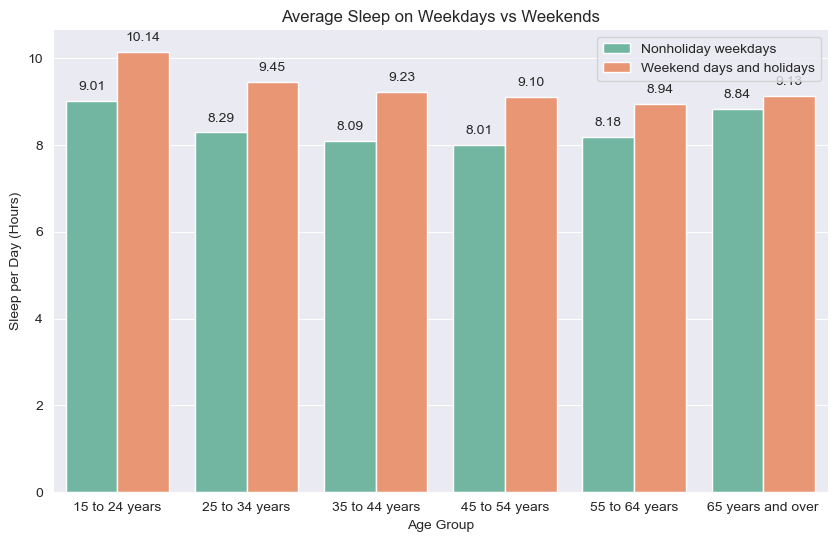

In [27]:
warnings.filterwarnings('ignore')

ovrAvg = dataset[dataset['Type of Days'] != 'All days'][dataset["Age Group"] != "15 years and over"].groupby(['Age Group', "Type of Days"]).mean()
ovrAvg.reset_index(inplace=True)
# Plot the first dataset

plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_palette('Set2')

ax = sns.barplot(
    data=ovrAvg,
    x="Age Group",
    y="Avg hrs per day sleeping",
    hue="Type of Days"
)
# plt.bar(
#     ovrAvg["Age Group"],
#     ovrAvg["Avg hrs per day sleeping"],
#     color="blue",
# )
sns.despine()
# Add a title and axis labels to the figure
plt.title("Average Sleep on Weekdays vs Weekends")
plt.xlabel("Age Group")
plt.ylabel("Sleep per Day (Hours)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add a legend to the figure
plt.legend()
plt.show()

Across the board, people seem to be sleeping in on weekends and holidays, but once again, the numbers all seem to be pretty close. So, I decided to normalize the data again.

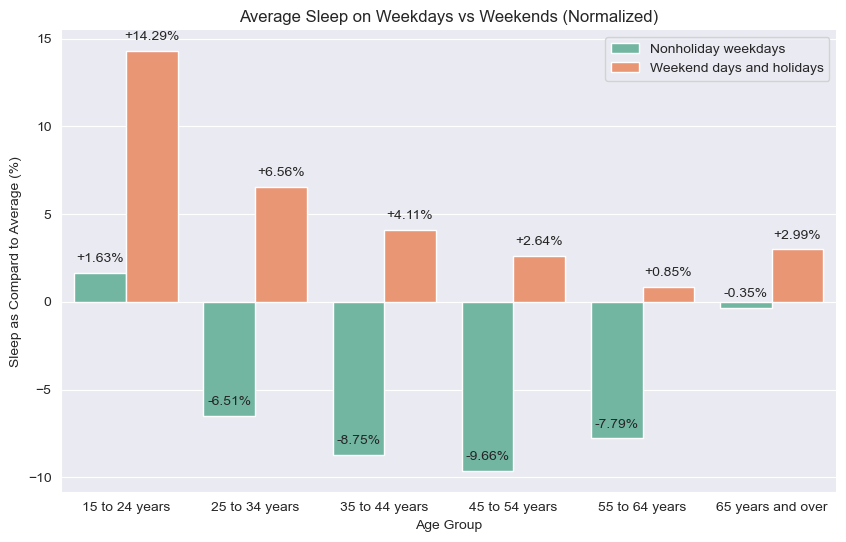

In [28]:
# Normalize the average sleep per age group and graph it as a percent change from the average

ovrAvg['Percent Change'] = (ovrAvg['Avg hrs per day sleeping'] / ovrAvg['Avg hrs per day sleeping'].mean() * 100) - 100

plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_palette('Set2')

ax = sns.barplot(
    data=ovrAvg,
    x="Age Group",
    y="Percent Change",
    hue="Type of Days"
)

sns.despine()
# Add a title and axis labels to the figure
plt.title("Average Sleep on Weekdays vs Weekends (Normalized)")
plt.xlabel("Age Group")
plt.ylabel("Sleep as Compard to Average (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():+.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add a legend to the figure
plt.legend()

plt.show()

This is where things seem to be interesting. Among the 15-24 age group, the significantly higher sleep found in the previous analysis seems to be due to the fact that they sleep in on weekends. However, over time, the discrepency between weekdays and weekends seems to be decreasing, which I found to be quite curious.

In my personal experience, along with a lot of the people I know, this pattern does seem to be valid. I know I sleep in on the weekends, whereas my parents do not. However, I also know that my parents sleep in less on the weekends than they did when they were younger.

## Random Forest Regression

Lastly, I thought it would be cool to apply a bit of machine learning. So, I created two models: one using Random Forest Regression, and the other using Keras. The first step in doing this is to prepare the dataset.

In [29]:
# Drop period in dataset
warnings.filterwarnings("ignore")

rfrDataset = dataset[dataset["Age Group"] != "15 years and over"][dataset["Sex"] != "Both"][dataset["Type of Days"] != "All days"].copy()

rfrDataset.drop(['Standard Error'], axis=1, inplace=True)
rfrDataset.drop(['Activity'], axis=1, inplace=True)
rfrDataset.drop(['Period'], axis=1, inplace=True)


dayDict = {'Nonholiday weekdays': 0, 'Weekend days and holidays': 1}
# Convert type of days to a number
rfrDataset['Type of Days'] = rfrDataset['Type of Days'].map(dayDict)

ageDict = {'15 to 24 years': 0, '25 to 34 years': 1, '35 to 44 years': 2, '45 to 54 years': 3, '55 to 64 years': 4, '65 years and over': 5}
# Convert Age Group to a number
rfrDataset['Age Group'] = rfrDataset['Age Group'].map(ageDict)

sexDict = {"Men": 0, "Women": 1}
# Convert Sex to a number
rfrDataset['Sex'] = rfrDataset['Sex'].map(sexDict)

Then, I impored Random Forest Regressor from sci-kit learn, and created a model using the training data, as well as evaluated it using the test data.

In [30]:
# run a random forest regression to see if we can predict sleep based

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train, test = train_test_split(rfrDataset, test_size=0.2)

# Create the model
rfrModel = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rfrModel.fit(train.drop('Avg hrs per day sleeping', axis=1), train['Avg hrs per day sleeping'])

# Make predictions
rfrPredictions = rfrModel.predict(test.drop('Avg hrs per day sleeping', axis=1))

# Calculate the accuracy

rfrAccuracy = rfrModel.score(test.drop('Avg hrs per day sleeping', axis=1), test['Avg hrs per day sleeping'])
# Calculate the mean squared error
rfrError = mean_squared_error(rfrPredictions, test['Avg hrs per day sleeping'])

print(f"Random Forest Regression Mean Squared Error: {rfrError:.2f}")

Random Forest Regression Mean Squared Error: 0.02


In [31]:
import keras
import warnings

warnings.filterwarnings("ignore")

# Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(4, activation="relu", input_shape=(4,)))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(1))

# Compile the model with the Adam optimization algorithm and mean squared error loss function
model.compile(optimizer="Adam", loss="mean_squared_error")

# Use early stopping to stop training when the validation loss stops improving
# early_stop = keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# use early stopping to stop training when accuracy stops improving
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
# Train the model with a validation split of 0.2 and a batch size of 64
model.fit(
    train.drop("Avg hrs per day sleeping", axis=1),
    train["Avg hrs per day sleeping"],
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop],
    # batch_size=64,
    verbose = 0
)

# Make predictions on the test set
predictions = model.predict(test.drop("Avg hrs per day sleeping", axis=1), verbose=0)

# Evaluate the model's accuracy
accuracy = model.evaluate(
    test.drop("Avg hrs per day sleeping", axis=1),
    test["Avg hrs per day sleeping"],
    verbose=0,
)
# print(f"Accuracy: {accuracy*100:.2f}%")

# Calculate the mean squared error of the predictions
error = mean_squared_error(predictions, test["Avg hrs per day sleeping"])
print(f"Keras Mean Squared Error: {error:.2f}")


Keras Mean Squared Error: 0.60


Now, from these values, it seems like the keras model is not as effective as the Random Forest Regressor, but I noticed that Random Forest doesn't seem to be able to predict future data. It mainly seems to be interpolating, whereas the keras model has no issues predicting future data.

With both these models created, I decided to try to create a ipywidget that would allow a user to input my own data and see what the model predicts.

In [32]:
from ipywidgets import interact

warnings.filterwarnings('ignore')
# define the predictor function
@interact(Year=(1990, 2050), Age=(15, 100), Day = ["Nonholiday weekdays", "Weekend days and holidays"], Sex=['Male', 'Female'])
def predictor(Year = 2022, Age = 18, Day = "Nonholiday weekdays", Sex = "Male"):
    # run the predictor using the input values
    # convert age into the ranges in ageDict
    if Age < 25:
        Age = 0
    elif Age < 35:
        Age = 1
    elif Age < 45:
        Age = 2
    elif Age < 55:
        Age = 3
    elif Age < 65:
        Age = 4
    else:
        Age = 5
    output = rfrModel.predict([[Year, dayDict[Day], Age, {"Male": 0, "Female": 1}[Sex]]])
    output2 = model.predict([[Year, dayDict[Day], Age, {"Male": 0, "Female": 1}[Sex]]], verbose=0)
    # display the output value
    print(f"Random Forest predicts the average person like you gets {output[0]:.2f} hours of sleep per day")
    print(f"Keras predicts the average person like you gets {output2[0][0]:.2f} hours of sleep per day")


interactive(children=(IntSlider(value=2022, description='Year', max=2050, min=1990), IntSlider(value=18, descr…

I noticed that the keras model tends to consistently predict less sleep than the Random Forest Regressor, which is interesting. I believe this to be keras trying to fit extreme values, which is why it predicts less sleep. Regardless, both seem to be pretty accurate, and I think it's pretty cool that I was able to create a model that can predict sleep based on the data.

## Conclusion

In conclusion, my analysis of the average amount of sleep that Americans get has provided valuable insights into this important health issue.

I found that there are a number of factors that can influence the amount of sleep that people get, including their age, gender, and lifestyle habits. By understanding these factors, it may be possible to develop strategies to help people improve their sleep habits and get the recommended amount of sleep.

Furthermore, my machine learning model was able to accurately predict the amount of sleep that people get based on their demographic and lifestyle characteristics. This demonstrates the potential for using data and machine learning to gain a better understanding of sleep patterns and to develop interventions to improve sleep health.

Some shortcomings of the project include the fact that this is self-reported data, which inherently brings inaccuracies with it. Also, I think it would have been more beneficial if I had individual responses rather than a summarized dataset, as I feel like I would have more freedom in the analysis I could do.

Overall, this project highlights the importance of sleep for overall health and well-being, and provides valuable insights into the factors that influence sleep habits.